Assignment: MLSL Individual Assignemnt

Name: Shreyas Namjoshi

PGID: 12110103

Email: shreyas_namjoshi_ampba2022s@isb.edu

1. [30 points] Visualizing Pairwise Fisher Discriminant
- Dataset: https://www.kaggle.com/c/digit-recognizer
- For every pair of classes (0, 1), (0, 9), …, (8, 9)
- Compute the Fisher Discriminant of each pixel (feature)
o Note that some of the pixels might have a zero denominator
o Treat that as 0 Fisher
- Normalize the remaining Fisher discriminant values from 0 to 1
- Draw the Fisher images of each of the pairs of classes
- See how they make sense (e.g., Class (0, 1), (3, 5), (4, 6)).
- This is “feature wise” Fisher goodness of each dimension

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Loading the data

In [3]:
df=pd.read_csv("C:\\Users\\pande\\Downloads\\train.csv")
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df = pd.DataFrame(df)
X = df.iloc[:, 1:].values
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [5]:
y = df.iloc[:, 0].values
y

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [6]:
#creating mean vectors

In [7]:
mean_vectors = []
for cl in range(0,10):
    mean_vectors.append(np.mean(X[y==cl], axis=0))


In [8]:
#creating standard Deviation vectors

In [9]:
std_vectors = []
for cl in range(0,10):
    std_vectors.append(np.std(X[y==cl], axis=0))
    

In [10]:
#Calculation of Pair Wise Fisher Discriminants

In [11]:
list=[]
for i in range(0,10):
    len1=len(X[y==i])
    for j in range(i+1,10):
        if i!=j:
            len2=len(X[y==j])
            list.append((((mean_vectors[i]-mean_vectors[j])**2)/((((len1*std_vectors[i]**2))+((len2*std_vectors[j]**2))))))

        

        

<ipython-input-11-7ad689dfb3b8>:7: RuntimeWarning: invalid value encountered in true_divide
  list.append((((mean_vectors[i]-mean_vectors[j])**2)/((((len1*std_vectors[i]**2))+((len2*std_vectors[j]**2))))))


In [12]:
#Replacing NAN with 0

In [13]:
FD=pd.DataFrame(list)
FD=FD.fillna(0)

In [14]:
# Standardizing using min max scaler

In [15]:
scaler=MinMaxScaler()
FD_NORM=scaler.fit_transform(FD)
FD_NORM=pd.DataFrame(FD_NORM)
FD_NORM

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.130276,0.209831,0.397827,0.850169,0.807276,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [16]:
#Draw the Fisher images of each of the pairs of classes

In [17]:
import matplotlib.pyplot as plt

In [18]:
test_array=FD_NORM.to_numpy()

In [19]:
pair=['0 ---- 1','0 ---- 2','0 ---- 3','0 ---- 4','0 ---- 5','0 ---- 6','0 ---- 7','0 ---- 8','0 ---- 9','1 ---- 2','1 ---- 3','1 ---- 4','1 ---- 5','1 ---- 6','1 ---- 7','1 ---- 8','1 ---- 9','2 ---- 3','2 ---- 4','2 ---- 5','2 ---- 6','2 ---- 7','2 ---- 8','2 ---- 9','3 ---- 4','3 ---- 5','3 ---- 6','3 ---- 7','3 ---- 8','3 ---- 9','4 ---- 5','4 ---- 6','4 ---- 7','4 ---- 8','4 ---- 9','5 ---- 6','5 ---- 7','5 ---- 8','5 ---- 9','6 ---- 7','6 ---- 8','6 ---- 9','7 ---- 8','7 ---- 9','8 ---- 9']
len(pair)

45

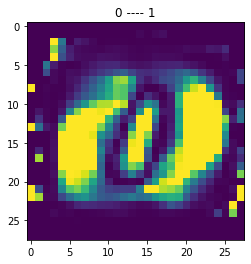

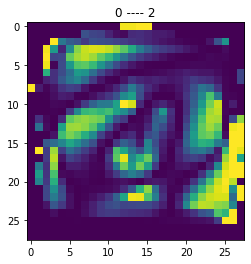

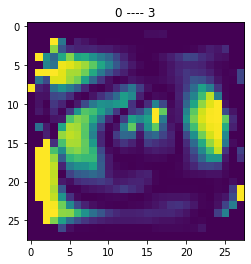

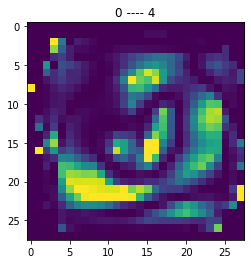

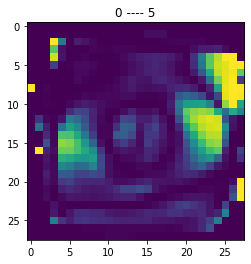

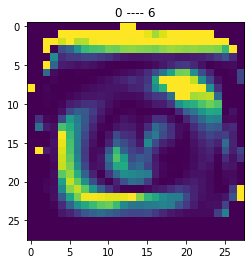

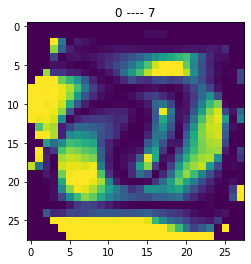

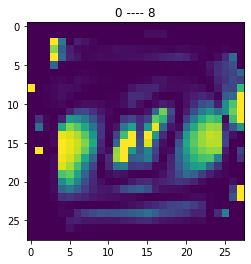

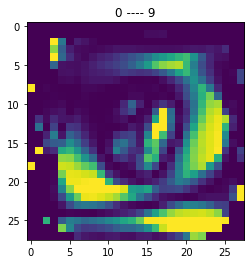

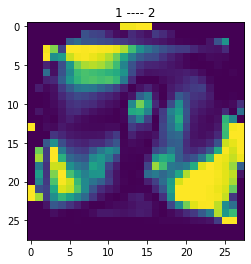

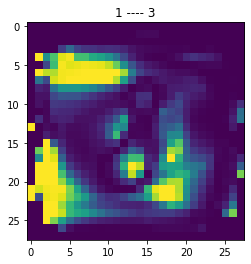

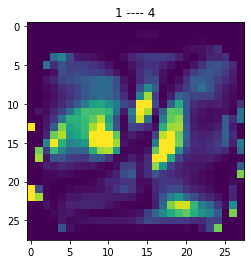

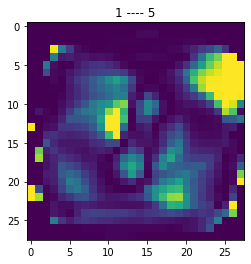

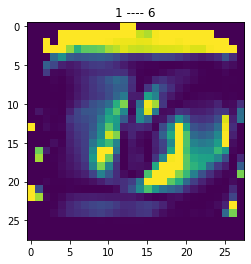

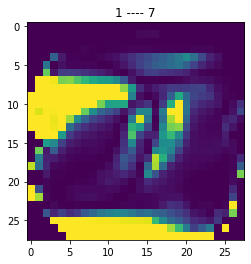

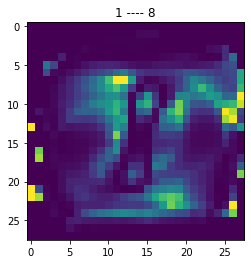

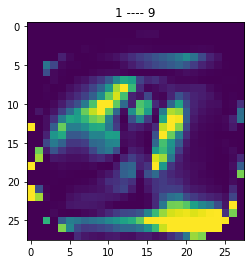

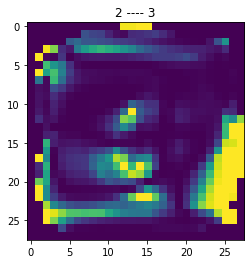

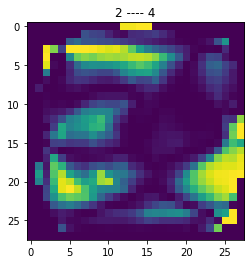

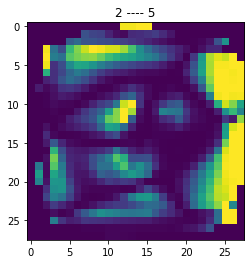

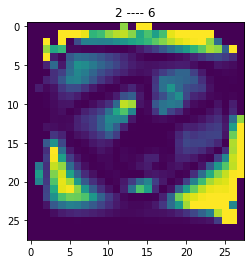

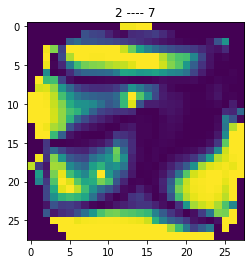

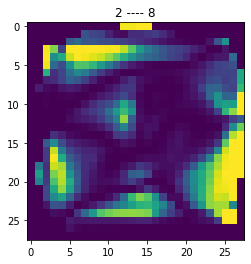

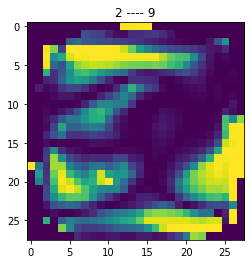

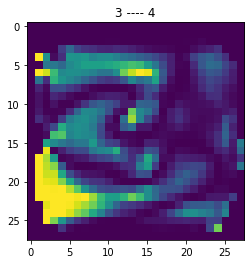

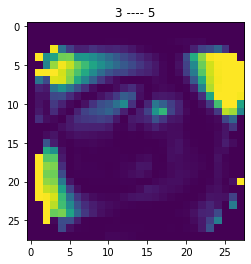

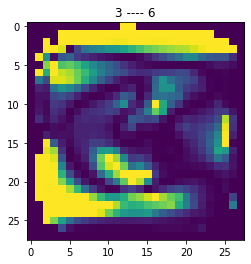

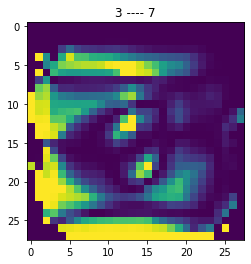

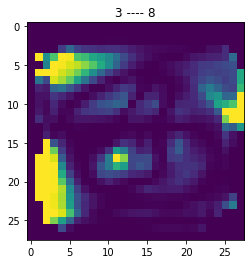

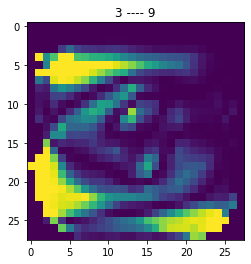

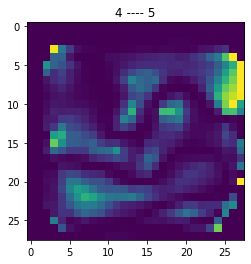

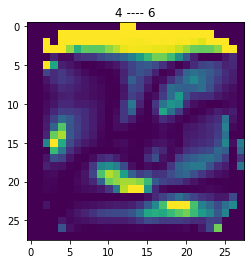

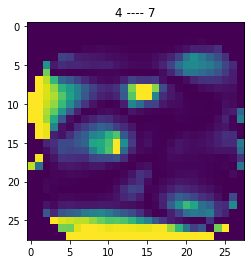

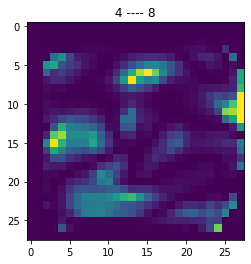

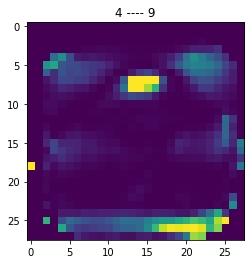

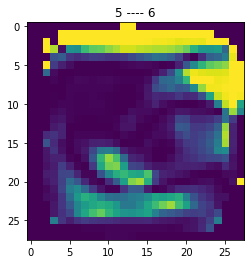

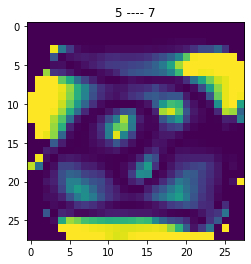

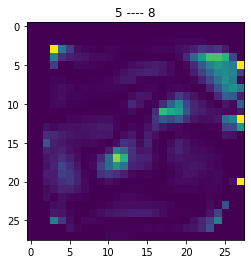

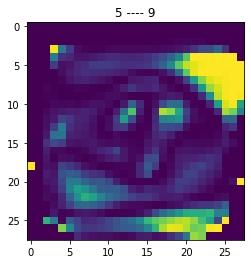

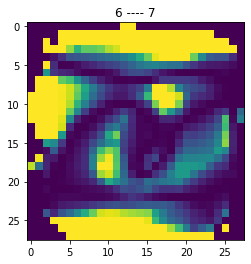

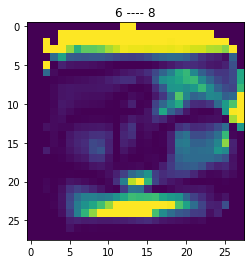

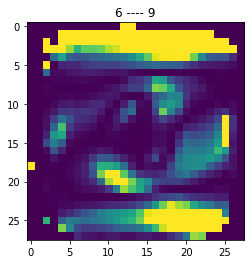

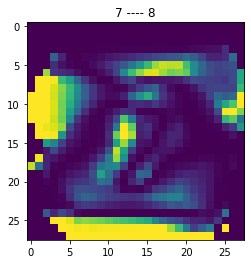

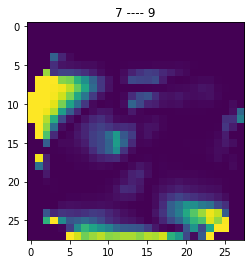

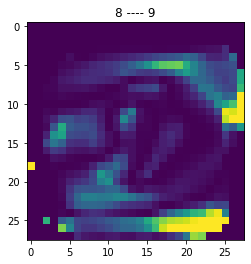

In [20]:
for i in range(0,len(test_array)):
    img=test_array[i]
    test=img.reshape(28,28)*255
    matrix=pd.DataFrame(test)
    plt.title(pair[i])
    plt.imshow(matrix)
    plt.show()
    

    

If we look at image for FD(0,1) , we can see 0 in the image and 1 is superimposed on the 0. Similarly we can see for different pair wise class such as FD(1,8) images etc.

2. [25 points] Parameter Sweep over Decision Trees
- Dataset: https://www.kaggle.com/uciml/mushroom-classification
- Divide it randomly into 65% training and 35% test data
- Build a Decision Tree classifier with the following hyper-parameter
combinations:
o Purity Measure: Entropy
o Maximum Depth:1, 2, 3, 4, 5, 6, 7
o Purity Threshold: 0.6, 0.7, 0.8, 0.9
o (Keep Size Threshold very low so only these two parameters are at
play)
- Create a 2-D Table (Depth vs. Purity) above values
- In each cell, write the “Training” and “Test” accuracy
- Make an observation about the best parameter combination
- Draw the decision tree using the tools available
- Write down the rules learnt by this decision tree

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV

In [22]:
df = pd.read_csv('C:\\Users\\pande\\Downloads\\mushrooms.csv')
df.head()
len(df)

8124

In [23]:
df[df.isnull().any(axis=1)]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


In [24]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [25]:
Y = df['class']
X = df.drop(['class'], axis=1)

In [26]:
#test train split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.35,stratify=Y,random_state=1)

In [28]:
#Decision Tree Classifier

In [29]:
depth=[1,2,3,4,5,6,7]
purity=[0.6,0.7,0.8,0.9]
acc_data=[]
for i in depth:
    k=i-1
    for j in purity:
        model = DecisionTreeClassifier(max_depth =i ,criterion="entropy",min_impurity_decrease=(1-j),min_samples_split=2)
        model.fit(x_train,y_train)
        test_accuracy=model.score(x_test,y_test)
        train_accuracy=model.score(x_train,y_train
                                )
        data=[i,j,train_accuracy,test_accuracy]
        acc_data.append(data)
        
    



In [30]:
#train and test accuracies for combinations of depth and purity

In [31]:
finalDF=pd.DataFrame(acc_data)
finalDF.columns=['Depth','Purity','Train Accuracy','Test Accuracy']
finalDF

,Depth,Purity,Train Accuracy,Test Accuracy
0,1,0.6,0.517992,0.517932
1,1,0.7,0.517992,0.517932
2,1,0.8,0.732576,0.727145
3,1,0.9,0.732576,0.727145
4,2,0.6,0.517992,0.517932
5,2,0.7,0.517992,0.517932
6,2,0.8,0.913447,0.914557
7,2,0.9,0.913447,0.914557
8,3,0.6,0.517992,0.517932
9,3,0.7,0.517992,0.517932


In [32]:
#Choose the best model

In [33]:
parameters = {'criterion':(['entropy']), 
              'min_samples_split':[2], 
              'max_depth':[1,2,3,4,5,6,7],
              'min_impurity_decrease':[0.4,0.3,0.2,0.1]
             }


tr = tree.DecisionTreeClassifier()
gsearch = GridSearchCV(tr, parameters)
gsearch.fit(x_train, y_train)
model = gsearch.best_estimator_
model

DecisionTreeClassifier(criterion='entropy', max_depth=3,
                       min_impurity_decrease=0.1)

In [34]:
model.fit(x_train,y_train)
pred_tree=model.score(x_test,y_test)
print("Decision Trees's Accuracy using entropy: ", pred_tree*100)

Decision Trees's Accuracy using entropy:  93.84669479606188


In [35]:
#Plotting Decision Trees

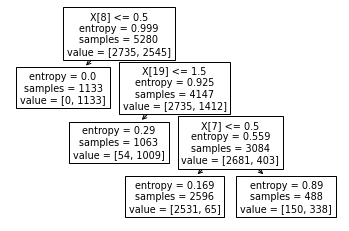

In [36]:
tree.plot_tree(model)
plt.show()

In [37]:
#Rules learnt by decision tree

In [38]:
rules=tree.export_text(model)
print(rules)

|--- feature_8 <= 0.50
|   |--- class: 1
|--- feature_8 >  0.50
|   |--- feature_19 <= 1.50
|   |   |--- class: 1
|   |--- feature_19 >  1.50
|   |   |--- feature_7 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_7 >  0.50
|   |   |   |--- class: 1



3. [20 points] Parameter Sweep on k-NN
- Dataset: https://www.kaggle.com/c/digit-recognizer
- Divide it randomly into 65% training and 35% test data
- Build a k-NN classifier with the following hyper-parameters: 
 K = 1, 3, 5, 7, 9, 11, 13, 15
- Plot the training and test accuracies for each K
- Find the optimal K for this task

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [40]:
#Load the data

In [41]:
df=pd.read_csv("C:\\Users\\pande\\Downloads\\train.csv")
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
Y = df['label']
X = df.drop(['label'], axis=1)

In [43]:
#test train split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.35,random_state=1,stratify=Y)

In [45]:
#KNN Classifier with k in [1, 3, 5, 7, 9, 11, 13, 15] and optimal value

In [46]:
kVals = [1, 3, 5, 7, 9, 11, 13, 15]
test_accuracies = []
train_accuracies=[]

# loop over various values of `k` for the k-Nearest Neighbor classifier
for k in kVals:
# train the k-Nearest Neighbor classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)

    # evaluate the model and update the accuracies list
    score_train = model.score(x_train, y_train)
    score_test = model.score(x_test, y_test)
    print("k=%d, accuracy=%.2f%%" % (k, score_test * 100))
    test_accuracies.append(score_test)
    train_accuracies.append(score_train)

# find the value of k that has the largest accuracy
i = int(np.argmax(test_accuracies))
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
    test_accuracies[i] * 100))

k=1, accuracy=96.39%
k=3, accuracy=96.43%
k=5, accuracy=96.34%
k=7, accuracy=96.01%
k=9, accuracy=95.85%
k=11, accuracy=95.61%
k=13, accuracy=95.61%
k=15, accuracy=95.38%
k=3 achieved highest accuracy of 96.43% on validation data


In [47]:
#Plotting train and test accuracies

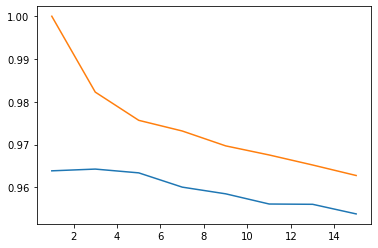

In [48]:
plt.plot(kVals,test_accuracies)
plt.plot(kVals,train_accuracies)

Optimal Value for K is 3.


4. [25 points] Classification with PCA vs. FISHER using k-NN
- Dataset: https://www.kaggle.com/c/digit-recognizer
- Apply 9-dimensional PCA – Call it the Digits-PCA dataset.
- Apply 9-dimensional FISHER – Call it the Digits-FISHER dataset.
- Divide the data into 65% training and 35% test (after projection).
- Build a Decision Tree classifier with depth 5, purity threshold 0.8 for
each dataset
o What is the train and test accuracy of Digits-PCA-Tree classifier?
o What is the train and test accuracy of Digits-FISHER-Tree
classifier?
- Build a k-NN classifier with k = 5 on both datasets
o What is the train and test accuracy of Digits-PCA-kNN classifier?
o What is the train and test accuracy of Digits-FISHER-kNN classifier?
- Write Conclusions about projection methods to be used for classification

In [49]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [50]:
#Loading the data

In [51]:
df=pd.read_csv("C:\\Users\\pande\\Downloads\\train.csv")
df.fillna(0, inplace=True)
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
Y = df['label']
X = df.drop(['label'], axis=1)

In [53]:
scaler=StandardScaler()
X_1=scaler.fit_transform(X)

In [54]:
#Creating 9D PCA

In [55]:
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(X_1)
DigitsPCA= pd.DataFrame(data = principalComponents
             , columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])
DigitsPCA['label']=Y
DigitsPCA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,label
0,-5.140477,-5.226446,3.886995,-0.901471,4.930125,2.032879,4.705660,-4.773088,0.229059,1
1,19.292337,6.032983,1.308154,-2.383296,3.096300,-1.793551,-3.787902,0.154993,-4.136600,0
2,-7.644504,-1.705781,2.289299,2.241241,5.094016,-4.152015,-1.018788,1.728916,0.435002,1
3,-0.474206,5.836169,2.008592,4.271055,2.379160,2.177564,4.394149,-0.361039,1.016293,4
4,26.559578,6.024770,0.933225,-3.012836,9.489682,-2.330481,-6.151675,-1.773953,-4.122934,0
...,...,...,...,...,...,...,...,...,...,...
41995,13.678840,-1.350338,-3.957399,-5.379529,10.873897,-5.102504,0.098526,-5.098868,-4.243316,0
41996,-8.869582,-1.187317,2.323133,1.528981,5.798807,-2.822816,-0.360703,0.524379,0.986053,1
41997,0.495395,7.076267,-12.089722,-3.223356,0.619143,0.328520,-2.139149,10.538316,-2.236742,7
41998,2.307237,-4.344503,0.699814,10.011151,-5.586253,-5.494580,0.199316,5.440205,2.212606,6


In [56]:
#Creating 9D Fisher

In [57]:
lda=LinearDiscriminantAnalysis(n_components=9)
lcomps=lda.fit_transform(X_1,Y)
DigitsFISHER= pd.DataFrame(data = lcomps,columns = ['LDA1','LDA2','LDA3','LDA4','LDA5','LDA6','LDA7','LDA8','LDA9'])
DigitsFISHER['label']=Y
DigitsFISHER

,LDA1,LDA2,LDA3,LDA4,LDA5,LDA6,LDA7,LDA8,LDA9,label
0,0.706982,3.702191,-0.546160,1.083590,-1.282057,-0.640238,-0.161646,0.711746,0.098052,1
1,-4.753373,-3.257093,-2.983682,-1.244001,-1.880934,-0.898564,0.114414,-1.097409,1.235790,0
2,0.426475,5.168707,-0.215028,0.248895,-3.737808,0.168903,0.546867,0.164058,-0.314798,1
3,-0.978410,-0.555503,1.147945,-0.324528,-0.997568,-0.858390,0.979497,1.846044,-0.207963,4
4,-4.878184,-3.244367,-4.723876,-0.850046,-1.923177,-2.093587,0.166724,-2.228554,0.999328,0
...,...,...,...,...,...,...,...,...,...,...
41995,-2.846328,-1.655570,-3.661467,0.658924,-1.528190,-0.680945,0.511808,-1.606290,-1.122931,0
41996,1.776876,4.591485,-0.370188,0.200660,-2.247352,-0.005172,1.093822,-0.204246,-0.427021,1
41997,3.078790,-2.807856,-3.082087,-2.657304,-1.939725,2.647739,-2.012444,0.094553,-0.028155,7
41998,-2.901593,-1.216585,4.178510,-1.426573,-1.557683,2.061918,1.035576,0.932003,-0.135465,6


In [58]:
X_F=DigitsFISHER.drop('label',axis=1)


In [59]:
X_PCA=DigitsPCA.drop('label',axis=1)

In [60]:
#Train and Test Split

In [61]:
x_train_F, x_test_F, y_train_F, y_test_F = train_test_split(X_F,Y,test_size=0.35,stratify=Y,random_state=1)

In [62]:
x_train_P, x_test_P, y_train_P, y_test_P = train_test_split(X_PCA,Y,test_size=0.35,stratify=Y,random_state=1)

In [63]:
#Decision Tree on Fisher

In [64]:
#Assuming criterion as entropy(criterion not given in the question)

In [65]:
model_DT_F=DecisionTreeClassifier(max_depth =5 ,criterion="entropy",min_impurity_decrease=(1-0.8))
model_DT_F.fit(x_train_F,y_train_F)
score_train_DT_F=model_DT_F.score(x_train_F,y_train_F)
score_test_DT_F=model_DT_F.score(x_test_F,y_test_F)
print("Training, accuracy=%.2f%%" % ( score_train_DT_F * 100))
print("Test, accuracy=%.2f%%" % ( score_test_DT_F * 100))

Training, accuracy=46.66%
Test, accuracy=46.51%


In [66]:
#Decision Tree on PCA

In [67]:
model_DT_P=DecisionTreeClassifier(max_depth =5 ,criterion="entropy",min_impurity_decrease=(1-0.8))
model_DT_P.fit(x_train_P,y_train_P)
score_train_DT_P=model_DT_P.score(x_train_P,y_train_P)
score_test_DT_P=model_DT_P.score(x_test_P,y_test_P)
print("Training, accuracy=%.2f%%" % ( score_train_DT_P * 100))
print("Test, accuracy=%.2f%%" % ( score_test_DT_P * 100))

Training, accuracy=28.63%
Test, accuracy=28.61%


In [68]:
#KNN on Fisher

In [69]:
k=5
model_F = KNeighborsClassifier(n_neighbors=k)
model_F.fit(x_train_F, y_train_F)
score_train_F=model_F.score(x_train_F,y_train_F)
score_test_F=model_F.score(x_test_F,y_test_F)
print("k=%d, Train accuracy=%.2f%%" % (k, score_train_F * 100))
print("k=%d, Test accuracy=%.2f%%" % (k, score_test_F * 100))

k=5, Train accuracy=93.85%
k=5, Test accuracy=91.46%


In [70]:
#KNN on PCA

In [71]:
k=5
model_P = KNeighborsClassifier(n_neighbors=k)
model_P.fit(x_train_P, y_train_P)
score_train_P=model_P.score(x_train_P,y_train_P)
score_test_P=model_P.score(x_test_P,y_test_P)
print("k=%d, Train accuracy=%.2f%%" % (k, score_train_P * 100))
print("k=%d, Test accuracy=%.2f%%" % (k, score_test_P * 100))

k=5, Train accuracy=91.59%
k=5, Test accuracy=88.07%


We see that Classification works betters on Fisher Data than on PCA data. This is evident because PCA captures maximum variance whereas is Fisher works on Maximizing the difference between class means and minimizing within class variance.
Since PCA works on capturing Max Variance and the projection is done in the region where max variance is captured.And this direction may not necessarily the direction where individual classes can be identified. Where as FD projects in the area where classes can be identified as it maximizes difference between the mean of two classes and reducing the variance within the class.
Also we can see that the accuracy is better is KNN than in Decision trees as KNN works on nearest neighbors.KNN do not train the model,it just stores the data points and when new data point comes, it just computes the class based on the point's nearest neighbors. Decision tree works on probabilistic approach based on Gini Index or Entropy. It starts the node with max entropy at each level in the tree. The complexity in Decision tree is based on combination of size,entropy. As the complexity is increased accuracy increased but with the same bias also increases.